In [1]:
import pandas as pd
import sklearn
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyaug import PyAugLinear, PyAugNormal, PyAugLogistic, PyAugLaplace
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, accuracy_score

# Credit Card Fraud Detection: ULB Dataset

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Inspecting Data

In [2]:
df = pd.read_csv('creditcard.csv')

print('DataFrame Shape:', df.shape, '\n')
print('Number of NaN/Null Values:')
print(df.isna().sum(), '\n')
print('DataFrame Head:')
print(df.head())

DataFrame Shape: (284807, 31) 

Number of NaN/Null Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64 

DataFrame Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22     

NOTE: No NaN values are present so we will not need to apply pd.fillna().

## Exploratory Data Analysis (EDA)

1) Histogram for each DataFrame feature.

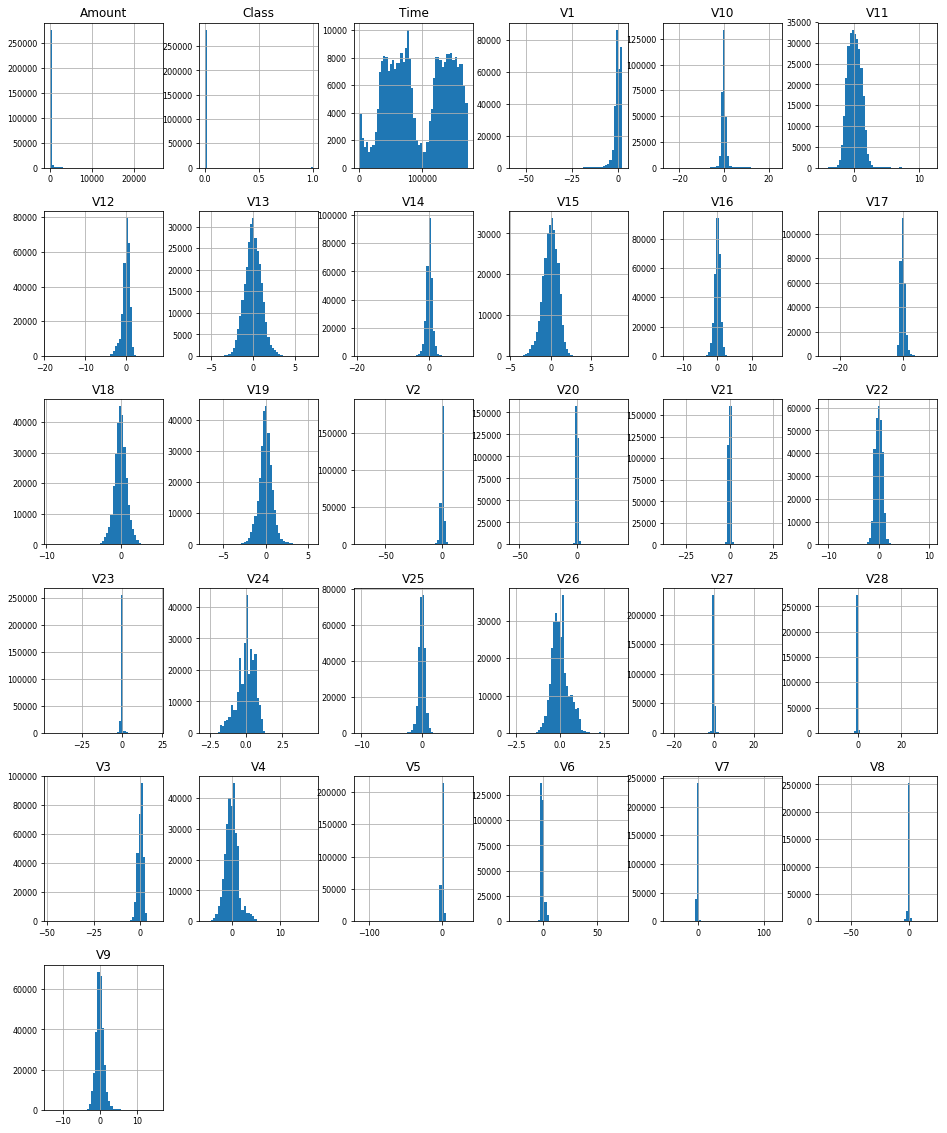

In [3]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

2) Correlation Matrix.

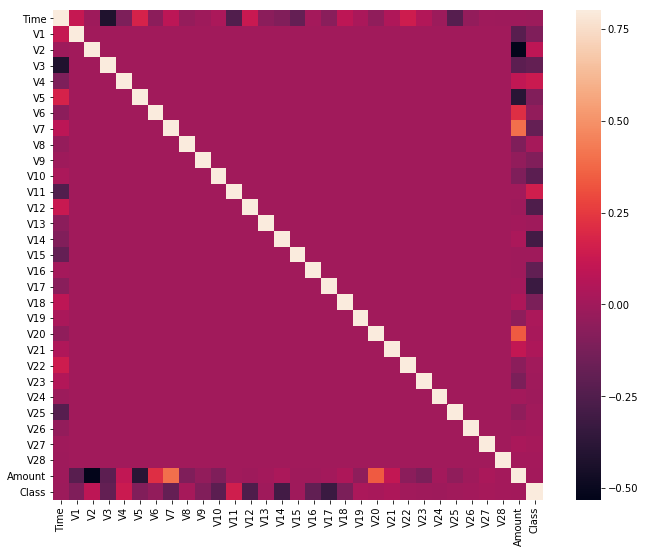

In [4]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=0.8, square = True)
plt.show()

NOTE: No correlation between PCA components is expected as they have already been subject to PCA whereas the 'Time' and 'Amount' features have not been subject to PCA.

3) Inspecting 'Time' feature in more detail.

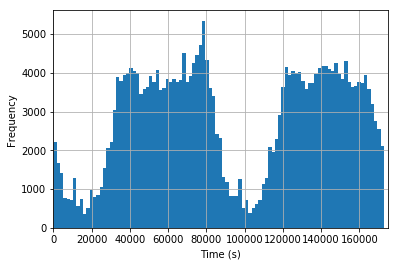

In [5]:
df['Time'].hist(bins=100)
plt.xlim([0, 175000])
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.show()

4) Investigating 'Amount' feature in more detail.

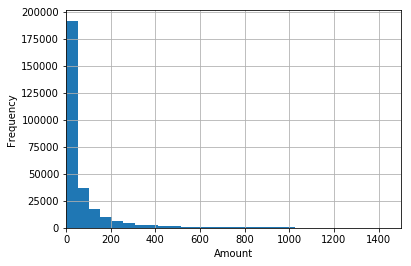

In [6]:
df['Amount'].hist(bins=500)
plt.xlim([0, 1500])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing for Machine Learning

In [7]:
scaler = StandardScaler()

X = df.drop('Class', axis = 1) # Remove target feature.
y = df['Class']

print('X DataFrame Shape:', X.shape)
print('y DataFrame Shape:', y.shape)

X_scaled = StandardScaler().fit_transform(X).reshape(-1, 1) # Reshape the NumPy array.
X_scaled = pd.DataFrame(X, columns = X.columns.values)

print(X.describe())

X DataFrame Shape: (284807, 30)
y DataFrame Shape: (284807,)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-1

## Logistic Regression Without Undersampling or Oversampling

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

lr = LogisticRegression(C=1e5, solver='liblinear') # Initiate LogisticRegression model.

lr.fit(X_train, y_train) # Fit the LogisticRegression model.
y_pred = lr.predict(X_test) # Predict y_pred values using X_test features.

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', float('%.3f' % accuracy_score(y_test, y_pred)))
print('ROC AUC Score:', float('%.3f' % roc_auc_score(y_test, y_pred)))

nonsample_rocauc = roc_auc_score(y_test, y_pred)

[[85285    11]
 [   71    76]]
Accuracy: 0.999
ROC AUC Score: 0.758


## Data Class Imbalance: Undersampling and Oversampling

Objective: have an equal split in data of both classifications.

<b>Methodology: Oversampling</b> <br>
Add additional copies of the under-represented class for instances where the sample contains low amounts of data.

<b>Methodology: Undersampling</b> <br>
Remove copies of the over-represented class for instances where the sample contains large amounts of data.

### Undersampling

#### Creating an Undersampled DataFrame with 50:50 Class Split

In [9]:
df = pd.read_csv('creditcard.csv')

print('Count Class 0 (Normal):', Counter(y)[0])
print('Count Class 1 (Fraud):', Counter(y)[1])

n_fraud = Counter(y)[1] # Count the number of fraudulent transactions.

df_class0 = df.loc[df['Class'] == 0]
df_class0 = df_class0.sample(Counter(y)[1]) # Take a sample of normal transactions with the same length as the fraudulent transactions.

df_class1 = df.loc[df['Class'] == 1]


df_undersample = pd.concat([df_class0, df_class1]) # Concatenate the DataFrames.
print('Shape of Concatenated DataFrame:', df_undersample.shape)

Count Class 0 (Normal): 284315
Count Class 1 (Fraud): 492
Shape of Concatenated DataFrame: (984, 31)


In [10]:
X = df_undersample.drop('Class', axis = 1) # Remove target feature.
y = df_undersample['Class']

X_scaled = StandardScaler().fit_transform(X).reshape(-1, 1) # Reshape the NumPy array. 
X_scaled = pd.DataFrame(X, columns = X.columns.values)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

lr = LogisticRegression(C = 1e5, solver='liblinear') # Initiate LogisticRegression model.

lr.fit(X_train, y_train) # Fit the LogisticRegression model.
y_pred = lr.predict(X_test) # Predict y_pred values using X_test features.

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', float('%.3f' % accuracy_score(y_test, y_pred)))
print('ROC AUC Score:', float('%.3f' % roc_auc_score(y_test, y_pred)))


rocauc_iteration = []
for _ in range(20): # Repeat aug_generator function and append results as list of lists.

    df_class0 = df.loc[df['Class'] == 0]
    df_class0 = df_class0.sample(Counter(y)[1]) # Take a sample of normal transactions with the same length as the fraudulent transactions.

    df_class1 = df.loc[df['Class'] == 1]

    df_undersample = pd.concat([df_class0, df_class1])
    
    X = df_undersample.drop('Class', axis = 1) # Remove target feature.
    y = df_undersample['Class']

    X_scaled = StandardScaler().fit_transform(X).reshape(-1, 1) # Reshape the NumPy array. 
    X_scaled = pd.DataFrame(X, columns = X.columns.values)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

    lr = LogisticRegression(C=1e5, solver='liblinear') # Initiate LogisticRegression model.

    lr.fit(X_train, y_train) # Fit the LogisticRegression model.
    y_pred = lr.predict(X_test) # Predict y_pred values using X_test features.
    
    rocauc_score = roc_auc_score(y_test, y_pred)    
    rocauc_iteration.append(rocauc_score)
    
undersample_rocauc = np.mean(rocauc_iteration)
print('Average ROC AUC Score:', undersample_rocauc.round(3))

[[141   6]
 [ 18 131]]
Accuracy: 0.919
ROC AUC Score: 0.919
Average ROC AUC Score: 0.9288579190065288


### Oversampling

#### Creating an Oversampled DataFrame Using PyAug

PyAug: PyAug is a library developed to augment Pandas DataFrames using statistical distributions. Currently, PyAug supports linear, normal, logistic and Laplace statistical distributions. An interactive web-application has been developed using the PyAug framework and is available at www.pyaug.com. 

In [11]:
df = pd.read_csv('creditcard.csv')

augmented_rows = 1000

print('Count Class 0 (Normal):', Counter(y)[0])
print('Count Class 1 (Fraud):', Counter(y)[1])

df_class0 = df.loc[df['Class'] == 0]
df_class0 = df_class0.sample(augmented_rows)
df_class1 = df.loc[df['Class'] == 1]

print('Shape of Class 0 DataFrame (Normal):', df_class0.shape)
print('Shape of Class 1 DataFrame (Fraud):', df_class1.shape)

augmented_class1 = PyAugLinear(df_class1, augmented_rows, 3, ['Class'])

df_oversample = pd.concat([df_class0, augmented_class1])
print('Shape of Concatenated DataFrame:', df_oversample.shape)

Count Class 0 (Normal): 492
Count Class 1 (Fraud): 492
Shape of Class 0 DataFrame (Normal): (1000, 31)
Shape of Class 1 DataFrame (Fraud): (492, 31)
Shape of Concatenated DataFrame: (2000, 31)


In [12]:
X = df_oversample.drop('Class', axis = 1) # Remove target feature.
y = df_oversample['Class']

X_scaled = StandardScaler().fit_transform(X).reshape(-1, 1) # Reshape the NumPy array. 
X_scaled = pd.DataFrame(X, columns = X.columns.values)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

lr = LogisticRegression(C = 1e5, solver = 'liblinear') # Initiate LogisticRegression model.

lr.fit(X_train, y_train) # Fit the LogisticRegression model.
y_pred = lr.predict(X_test) # Predict y_pred values using X_test features.

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', float('%.3f' % accuracy_score(y_test, y_pred)))
print('ROC AUC Score:', float('%.3f' % roc_auc_score(y_test, y_pred)))

[[299   9]
 [ 17 275]]
Accuracy: 0.957
ROC AUC Score: 0.956


## Optimising Augmented Row Count

Improved Performance Using PyAug: 100 %
Best Number of Augmented Rows: 1900
Model Improvement: 0.92 %


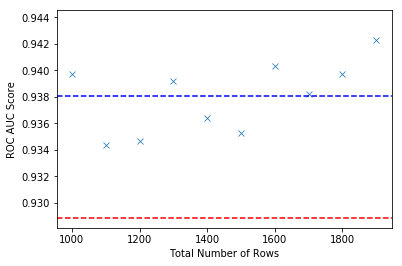

In [21]:
low_limit = int(round(len(df_class1) + 5.1, -1))
high_limit = int(len(df_class0))

augmented_row_range = list(range(low_limit, high_limit, 50)) # Create list of augmented rows.


def aug_generator(aug_list):
    optimisation_results = []
    ROCAUC_results = []
    for i in aug_list:
        class0 = df_class0.sample(i) # Create sample of augmented rows containing class 0.
        class1 = augmented_class1.sample(i) # Create sample of augmented rows containing class 1.

        df_combined = pd.concat([class0, class1])

        X = df_combined.drop('Class', axis = 1) # Remove target feature.
        y = df_combined['Class']

        X_scaled = StandardScaler().fit_transform(X).reshape(-1, 1) # Reshape the NumPy array. 
        X_scaled = pd.DataFrame(X, columns = X.columns.values)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

        lr = LogisticRegression(C = 1e5, solver ='liblinear') # Initiate LogisticRegression model.

        lr.fit(X_train, y_train) # Fit the LogisticRegression model.
        y_pred = lr.predict(X_test) # Predict y_pred values using X_test features.
        
        accuracy = accuracy_score(y_test, y_pred)
        ROCAUC = roc_auc_score(y_test, y_pred)

        performance_scores = (i, accuracy, ROCAUC) # row_number, accuracy, ROC AUG.
        optimisation_results.append(performance_scores)
        ROCAUC_results.append(ROCAUC)
        
    return ROCAUC_results

    
iteration_list = []
for _ in range(20): # Repeat aug_generator function and append results as list of lists.
    augmented_iteration = aug_generator(augmented_row_range)
    iteration_list.append(augmented_iteration)

df = pd.DataFrame(iteration_list, columns = augmented_row_range) # Create DataFrame from list of lists.


number_rows = [i * 2 for i in augmented_row_range] # Evaluate total number of rows.
model_rocauc = list(df.mean(axis = 0))
average_model_rocauc = np.mean(model_rocauc)

results_improved = len([i for i in model_rocauc if i > undersample_rocauc]) # Fraction of model_rocauc greater than undersample_rocauc.
print('Improved Performance Using PyAug:', int(results_improved / len(augmented_row_range) * 100), '%')

max_index = model_rocauc.index(max(model_rocauc)) # Evaluate the index of highest roc_auc score.
print('Best Number of Augmented Rows:', number_rows[max_index])

model_improvement = ((average_model_rocauc - undersample_rocauc) * 100).round(3)
print('Model Improvement:', model_improvement, '%')

sns.scatterplot(number_rows, model_rocauc, marker = 'x')
plt.axhline(average_model_rocauc, ls = '--', c = 'b')
plt.axhline(undersample_rocauc, ls = '--', c = 'r')
plt.xlabel('Total Number of Rows')
plt.ylabel('ROC AUC Score')
plt.show()    

# Conclusion

Applying undersampling and oversampling techniques is an effective method for handling imbalanced datasets. When machine learning (logistic regression model) was applied to the dataset we observe a high reported accuracy of 99.9%. However, this is deceiving as the ROC AUC score is only 75.8% which suggests that the model reports a high number of false positive and false negative results. When undersampling was applied to the dataset (generating a limit of 984 observations) we observe a similar accuracy and an improved ROC AUC score. Finally, when oversampling was applied to the dataset using the PyAug Python library we observe an improved to the ROC AUC score over 10 iterations. 
